How to evaluate whether a neural network is trained?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

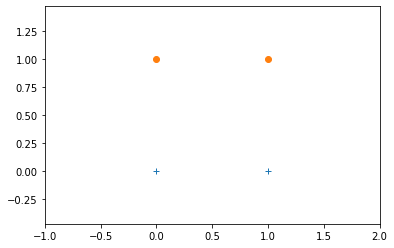

In [3]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
sampleNo = 2
s = np.array([[0,0,1],[1,1,1],[1,0,0],[0,1,0]])
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


plt.plot([0,1],[0,0],'+')
plt.plot([1,0],[1,1],'o')
plt.axis("equal")
plt.axis([-1,2,-1,2])
plt.show()

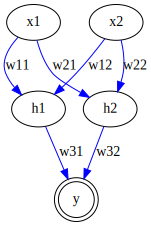

In [4]:
from graphviz import Digraph
u = Digraph()
u.edge("x1", "h1", label="w11", color="blue")
u.edge("x1", "h2", label="w21", color="blue")
u.edge("x2", "h1", label="w12", color="blue")
u.edge("x2", "h2", label="w22", color="blue")
u.edge("h1", "y", label="w31", color="blue")
u.edge("h2", "y", label="w32", color="blue")
u.node("y", shape="doublecircle")
u

In [7]:
def twolayerNN(s, sampleNo):
    # 随机初始化各个参数
    w11 = np.random.rand()
    w12 = np.random.rand()
    w21 = np.random.rand()
    w22 = np.random.rand()
    w31 = np.random.rand()
    w32 = np.random.rand()
    b1 = np.random.rand()
    b2 = np.random.rand()
    b3 = np.random.rand()
    loss = 100000
    epoch = 0
    MaxEpoch = 1000
    lr = 1

    while True:
        if(epoch%20==0):
            print("epoch:", epoch)
            print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
            print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
            print("w31:%.2f, w32:%.2f, b3:%.2f"%(w31,w32,b3))
        lastloss = loss
        loss = 0
        partialw11 = 0
        partialw12 = 0
        partialb1 = 0
        partialw21 = 0
        partialw22 = 0
        partialb2 = 0
        partialw31 = 0
        partialw32 = 0
        partialb3 = 0
        for k in range(sampleNo):
            h1 = sigmoid(w11*s[k,0]+w12*s[k,1]+b1)
            h2 = sigmoid(w21*s[k,0]+w22*s[k,1]+b2)
            yhat = sigmoid(w31*h1+w32*h2+b3)
            #print("%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f"%(s[k,0], s[k,1], s[k,2], h1, h2, yhat))
            y = s[k,2]
            loss += (yhat-y)*(yhat-y)

            partialw31 += 2*(yhat-y)*yhat*(1-yhat)*h1
            partialw32 += 2*(yhat-y)*yhat*(1-yhat)*h2
            partialb3 += 2*(yhat-y)*yhat*(1-yhat)

            partialh1 = 2*(yhat-y)*yhat*(1-yhat)*w31
            partialh2 = 2*(yhat-y)*yhat*(1-yhat)*w32

            partialw11 += partialh1*h1*(1-h1)*s[k,0]
            partialw12 += partialh1*h1*(1-h1)*s[k,1]
            partialb1 += partialh1*h1*(1-h1)

            partialw21 += partialh2*h2*(1-h2)*s[k,0]
            partialw22 += partialh2*h2*(1-h2)*s[k,1]
            partialb2 += partialh2*h2*(1-h2)

        if(epoch%20==0):
            print("loss:%.2f"%loss)
        #if(lastloss<loss):
        #    break
        w11 = w11 - lr * partialw11
        w12 = w12 - lr * partialw12
        b1 = b1 - lr * partialb1
        w21 = w21 - lr * partialw21
        w22 = w22 - lr * partialw22
        b2 = b2 - lr * partialb2
        w31 = w31 - lr * partialw31
        w32 = w32 - lr * partialw32
        b3 = b3 - lr * partialb3
        epoch = epoch+1
        if(epoch>MaxEpoch):
            break
        if(loss<0.01):
            break
    print("epoch:", epoch)
    print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
    print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
    print("w31:%.2f, w32:%.2f, b3:%.2f"%(w31,w32,b3))
    print("loss:%.2f"%loss)
twolayerNN(s, 4)

epoch: 0
w11:0.94, w12:0.75, b1:0.89
w21:0.43, w22:0.52, b2:0.17
w31:0.62, w32:0.57, b3:0.45
loss:1.35
epoch: 20
w11:0.92, w12:0.73, b1:0.85
w21:0.37, w22:0.46, b2:0.10
w31:-0.09, w32:0.18, b3:-0.05
loss:1.00
epoch: 40
w11:0.97, w12:0.79, b1:0.84
w21:0.34, w22:0.44, b2:0.09
w31:-0.29, w32:0.22, b3:0.09
loss:1.00
epoch: 60
w11:1.08, w12:0.93, b1:0.79
w21:0.31, w22:0.41, b2:0.08
w31:-0.51, w32:0.29, b3:0.24
loss:0.99
epoch: 80
w11:1.27, w12:1.17, b1:0.70
w21:0.29, w22:0.39, b2:0.07
w31:-0.81, w32:0.39, b3:0.42
loss:0.98
epoch: 100
w11:1.59, w12:1.52, b1:0.50
w21:0.28, w22:0.39, b2:0.07
w31:-1.21, w32:0.56, b3:0.65
loss:0.95
epoch: 120
w11:2.07, w12:2.04, b1:0.15
w21:0.32, w22:0.43, b2:0.06
w31:-1.78, w32:0.80, b3:0.94
loss:0.90
epoch: 140
w11:2.69, w12:2.69, b1:-0.23
w21:0.44, w22:0.56, b2:0.00
w31:-2.47, w32:1.17, b3:1.24
loss:0.81
epoch: 160
w11:3.32, w12:3.33, b1:-0.51
w21:0.65, w22:0.77, b2:-0.25
w31:-3.13, w32:1.69, b3:1.48
loss:0.72
epoch: 180
w11:3.85, w12:3.88, b1:-0.76
w21:0.97,

Our model evaluation is based one the loss function. It means that when the loss is close to 0 so taking a least error closing to 0 and stop the training when the loss is inferieur to that least error.

We can also at the end of each learning iteration, you can calculate the error on a validation data (not shown during the training). The best configuration to be saved is thus the one with minimal error rate on the validation set. But that is when we split our data in training and validation set.